In [11]:
from Bio import SeqIO
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

PATH_TO_GB = '../../raw/blattodea_genbank/cockroach_complete_refseq.gb'
PATH_TO_RESULT = '../../figures'

In [3]:

skew_types = ['AT', 'AG', 'AC', 'TA', 'TG','TC', 'GT', 'GA', 'GC', 'CG', 'CA', 'CT']
characteristics_list = ['Species', 'Taxonomy', 'Sequence', 'A', 'T','G', 'C']
characteristics = {}
df = pd.DataFrame(columns=characteristics_list)
for char in characteristics_list:
    characteristics[char] = 0
for entry in SeqIO.parse(PATH_TO_GB, 'genbank'):
    for feat in entry.features:
        if feat.type == 'CDS':
            characteristics['Species'] = entry.annotations['organism']
            characteristics['Taxonomy'] = entry.annotations['taxonomy']
            if 'gene' not in feat.qualifiers:
                characteristics['Gene_name'] = 'NA'
            else:
                characteristics['Gene_name'] = ''.join(feat.qualifiers['gene'])
            characteristics['Sequence'] = feat.location.extract(entry).seq
            characteristics['A'] = characteristics['Sequence'].count('A')
            characteristics['T'] = characteristics['Sequence'].count('T')
            characteristics['G'] = characteristics['Sequence'].count('G')
            characteristics['C'] = characteristics['Sequence'].count('C')
            df = df.append(characteristics, ignore_index=True)
for skew_type in skew_types:
    dividend = list(skew_type)[0]
    divisor = list(skew_type)[1]
    skew = (df[dividend] - df[divisor])/(df[dividend] + df[divisor])
    df = df.merge(skew.rename(f'{skew_type}skew'), left_index=True, right_index=True)

In [4]:
df

,Species,Taxonomy,Sequence,A,T,G,C,Gene_name,ATskew,AGskew,ACskew,TAskew,TGskew,TCskew,GTskew,GAskew,GCskew,CGskew,CAskew,CTskew
0,Periplaneta brunnea,"[Eukaryota, Metazoa, Ecdysozoa, Arthropoda, He...","(A, T, G, A, C, C, A, A, C, A, A, T, T, C, A, ...",387,404,100,138,ND2,-0.021492,0.589322,0.474286,0.021492,0.603175,0.490775,-0.603175,-0.589322,-0.159664,0.159664,-0.474286,-0.490775
1,Periplaneta brunnea,"[Eukaryota, Metazoa, Ecdysozoa, Arthropoda, He...","(A, C, T, C, T, G, C, A, A, C, G, A, T, G, A, ...",505,545,244,245,COX1,-0.038095,0.348465,0.346667,0.038095,0.381496,0.379747,-0.381496,-0.348465,-0.002045,0.002045,-0.346667,-0.379747
2,Periplaneta brunnea,"[Eukaryota, Metazoa, Ecdysozoa, Arthropoda, He...","(A, T, G, A, C, A, A, C, A, T, G, A, G, C, T, ...",257,236,91,101,COX2,0.042596,0.477011,0.435754,-0.042596,0.443425,0.400593,-0.443425,-0.477011,-0.052083,0.052083,-0.435754,-0.400593
3,Periplaneta brunnea,"[Eukaryota, Metazoa, Ecdysozoa, Arthropoda, He...","(A, T, C, C, C, A, C, A, A, A, T, A, A, T, A, ...",72,59,8,20,ATP8,0.099237,0.8,0.565217,-0.099237,0.761194,0.493671,-0.761194,-0.8,-0.428571,0.428571,-0.565217,-0.493671
4,Periplaneta brunnea,"[Eukaryota, Metazoa, Ecdysozoa, Arthropoda, He...","(A, T, G, A, T, A, A, G, T, A, A, T, T, T, A, ...",257,246,75,103,ATP6,0.021869,0.548193,0.427778,-0.021869,0.53271,0.409742,-0.53271,-0.548193,-0.157303,0.157303,-0.427778,-0.409742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Periplaneta fuliginosa,"[Eukaryota, Metazoa, Ecdysozoa, Arthropoda, He...","(A, T, G, T, T, A, A, A, A, T, T, T, T, T, A, ...",374,656,187,121,ND4,-0.273786,0.333333,0.511111,0.273786,0.556346,0.688546,-0.556346,-0.333333,0.214286,-0.214286,-0.511111,-0.688546
191,Periplaneta fuliginosa,"[Eukaryota, Metazoa, Ecdysozoa, Arthropoda, He...","(A, T, G, A, T, A, A, T, T, A, T, T, T, T, T, ...",79,154,35,17,ND4L,-0.321888,0.385965,0.645833,0.321888,0.62963,0.80117,-0.62963,-0.385965,0.346154,-0.346154,-0.645833,-0.80117
192,Periplaneta fuliginosa,"[Eukaryota, Metazoa, Ecdysozoa, Arthropoda, He...","(A, T, T, A, A, A, T, A, T, A, T, C, C, T, A, ...",221,183,39,57,ND6,0.094059,0.7,0.589928,-0.094059,0.648649,0.525,-0.648649,-0.7,-0.1875,0.1875,-0.589928,-0.525
193,Periplaneta fuliginosa,"[Eukaryota, Metazoa, Ecdysozoa, Arthropoda, He...","(A, T, G, A, A, T, A, A, A, C, C, T, A, T, A, ...",391,411,147,183,CYTB,-0.024938,0.453532,0.362369,0.024938,0.473118,0.383838,-0.473118,-0.453532,-0.109091,0.109091,-0.362369,-0.383838


/tmp/ipykernel_42290/1927617965.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[row,column].set_xticklabels(axes[row,column].get_xticks(), rotation = 45)


<AxesSubplot:xlabel='Gene_name', ylabel='CTskew'>

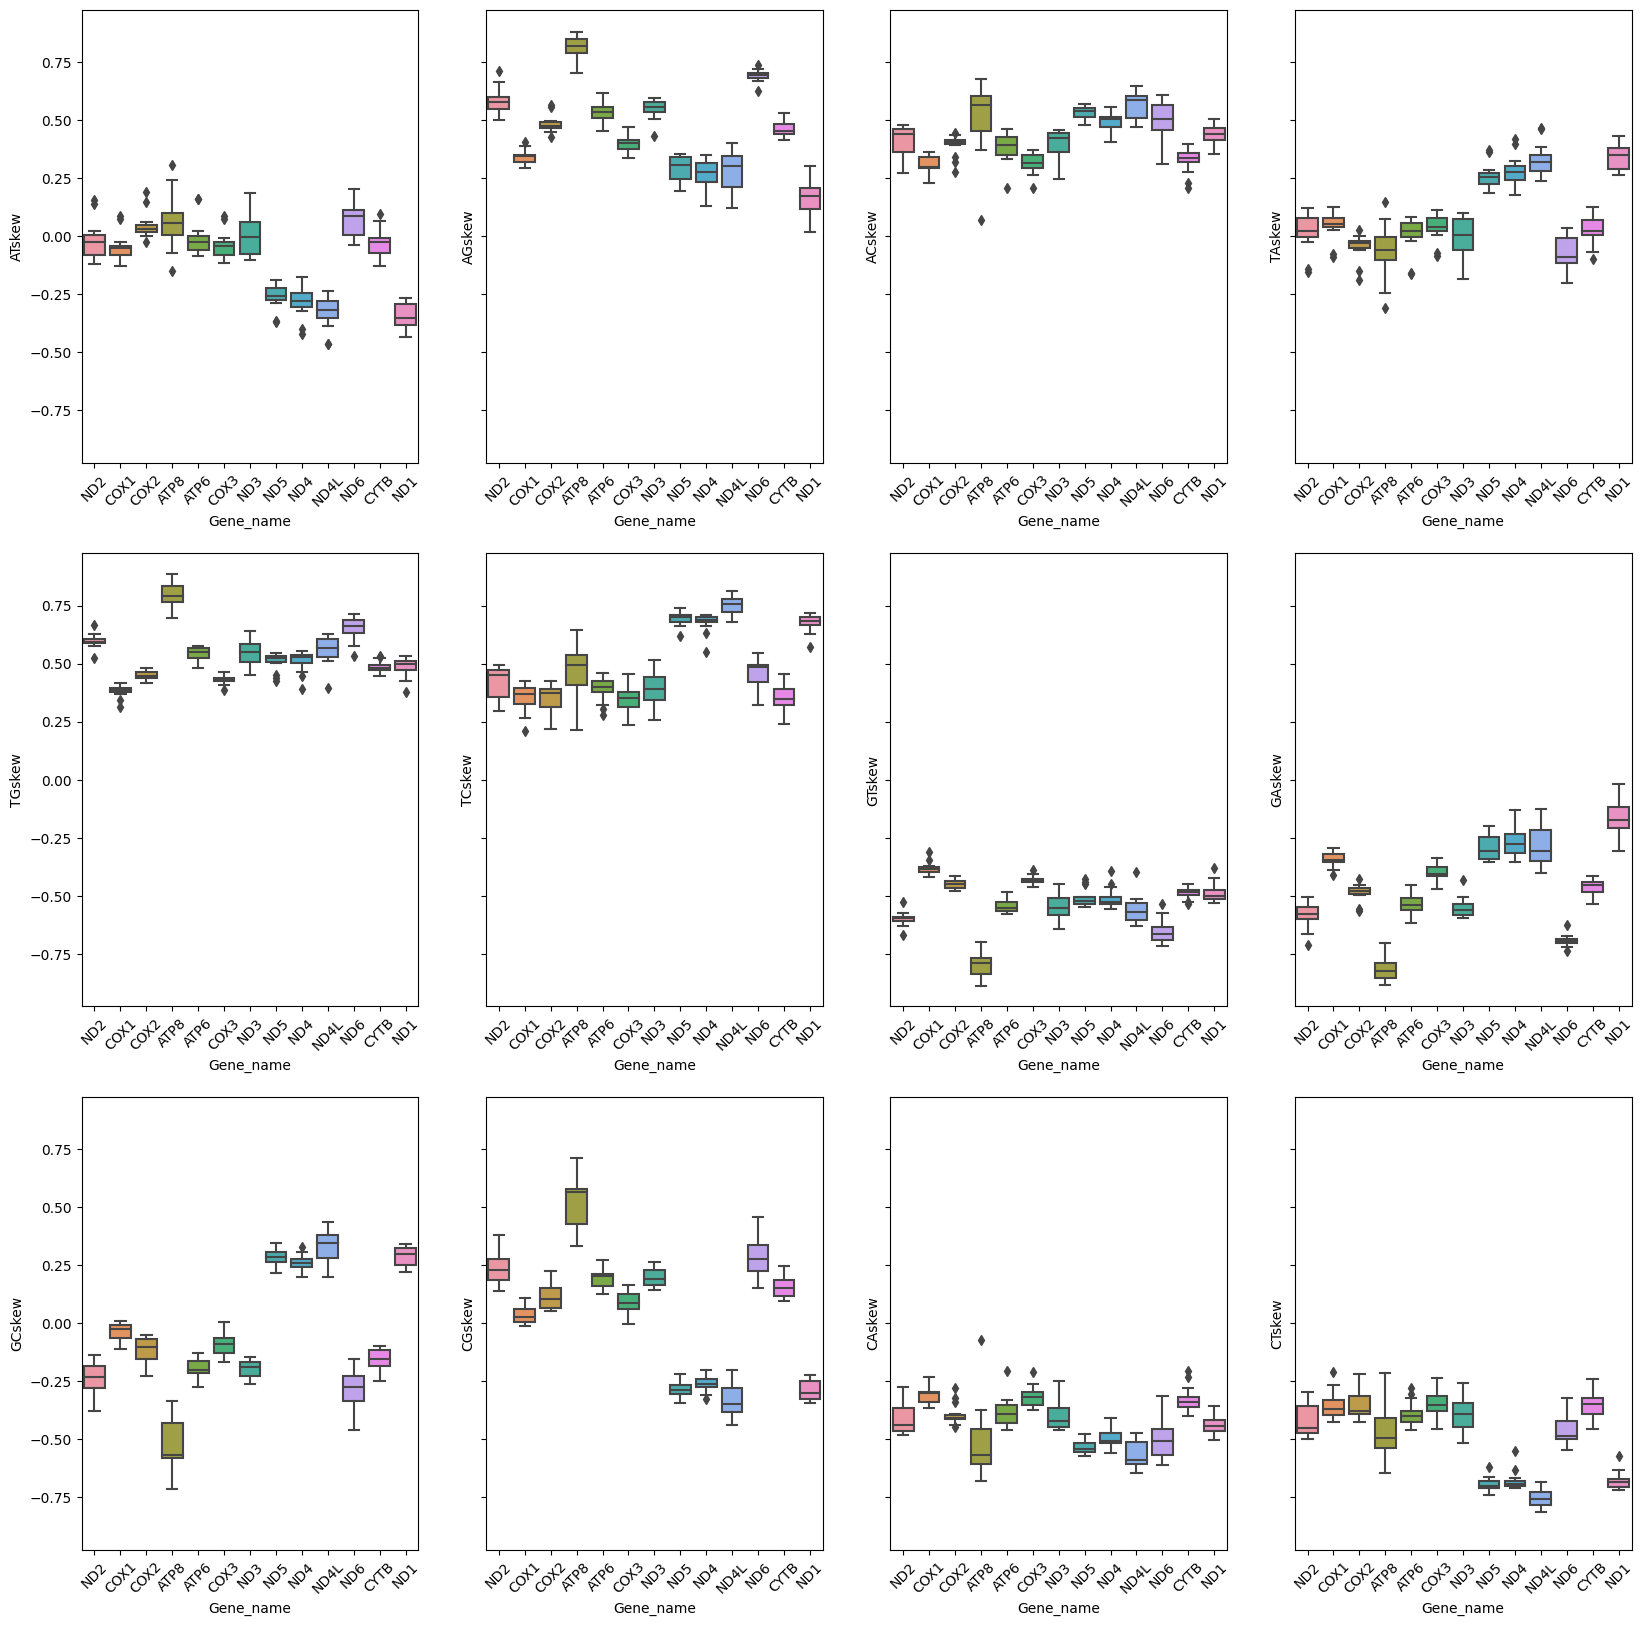

In [57]:
fig, axes = plt.subplots(3, 4, sharey=True, figsize=(20,20))
for row in range(3):
    for column in range(4):
        axes[row,column].set_xticklabels(axes[row,column].get_xticks(), rotation = 45) 
sns.boxplot(data=df, ax=axes[0,0], x="Gene_name", y="ATskew")
sns.boxplot(data=df, ax=axes[0,1], x="Gene_name", y="AGskew")
sns.boxplot(data=df, ax=axes[0,2], x="Gene_name", y="ACskew")
sns.boxplot(data=df, ax=axes[0,3], x="Gene_name", y="TAskew")
sns.boxplot(data=df, ax=axes[1,0], x="Gene_name", y="TGskew")
sns.boxplot(data=df, ax=axes[1,1], x="Gene_name", y="TCskew")
sns.boxplot(data=df, ax=axes[1,2], x="Gene_name", y="GTskew")
sns.boxplot(data=df, ax=axes[1,3], x="Gene_name", y="GAskew")
sns.boxplot(data=df, ax=axes[2,0], x="Gene_name", y="GCskew")
sns.boxplot(data=df, ax=axes[2,1], x="Gene_name", y="CGskew")
sns.boxplot(data=df, ax=axes[2,2], x="Gene_name", y="CAskew")
sns.boxplot(data=df, ax=axes[2,3], x="Gene_name", y="CTskew")
